In [68]:
from collections import Counter
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

plt.rcParams["figure.figsize"] = (20, 10)
sns.set_theme(style="darkgrid")

In [10]:
from src.data_loader import DataLoader, EVAL_DIR, TRAIN_DIR

In [11]:
random_entry1, random_entry2 = next(DataLoader.get_train_iter(batch_size=2))

In [12]:
random_entry1.data

,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG A2-REF,EEG FZ-REF,EEG CZ-REF,EEG PZ-REF,EEG EKG1-REF,EEG T1-REF,EEG T2-REF,IBI,BURSTS,SUPPR
0,4907.684,4722.900,4908.142,4623.871,2863.313,4999.847,4907.989,4959.869,4999.694,4907.837,...,4909.363,4988.250,-2941.126,-1512.599,4958.648,-2705.378,4818.268,0.0,0.0,0.0
1,4919.281,4715.118,4918.365,4554.443,2626.802,4999.847,4919.128,4952.087,4999.847,4919.433,...,4918.365,4999.847,-2714.533,-1399.684,4952.240,-2510.828,4830.780,0.0,0.0,0.0
2,4906.006,4743.347,4906.769,4631.653,2677.919,4999.847,4906.463,4946.136,4999.847,4906.311,...,4914.398,4999.847,-2769.465,-1434.627,4945.373,-2560.724,4829.864,0.0,0.0,0.0
3,4898.071,4690.704,4897.461,4548.797,2521.974,4999.847,4898.071,4939.422,4999.847,4898.224,...,4961.395,4999.847,-2599.787,-1340.938,4938.965,-2387.537,4804.992,0.0,0.0,0.0
4,4897.613,4727.630,4897.766,4598.846,2487.642,4999.847,4897.766,4932.708,4999.847,4897.766,...,4998.931,4999.847,-2580.713,-1344.142,4932.403,-2369.074,4833.526,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316995,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
316996,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
316997,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
316998,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0


In [13]:
random_entry2.data

,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG A2-REF,EEG FZ-REF,EEG CZ-REF,EEG PZ-REF,EEG EKG1-REF,EEG T1-REF,EEG T2-REF,IBI,BURSTS,SUPPR
0,-49.130,-47.451,-42.111,-14.492,-41.653,-30.361,-43.331,-18.154,-24.258,-35.855,...,-39.212,-38.296,-42.874,-41.806,-48.672,-52.944,-38.601,0.0,0.0,0.0
1,-46.993,-43.179,-41.958,-14.492,-43.331,-35.702,-45.010,-19.528,-24.563,-35.550,...,-39.212,-37.075,-42.416,-41.500,-52.334,-49.587,-29.141,0.0,0.0,0.0
2,-46.841,-43.179,-42.111,-12.051,-39.669,-36.312,-44.400,-19.070,-23.953,-37.075,...,-39.669,-36.312,-41.653,-40.890,-64.083,-54.318,-35.092,0.0,0.0,0.0
3,-42.874,-40.432,-45.163,-13.577,-43.789,-37.228,-46.688,-21.817,-25.936,-40.127,...,-32.040,-36.618,-42.569,-43.026,-56.759,-50.045,-30.514,0.0,0.0,0.0
4,-34.634,-33.413,-37.686,-18.002,-43.484,-42.416,-48.672,-24.410,-26.852,-38.754,...,-34.634,-34.329,-42.111,-44.552,-58.590,-51.419,-28.836,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329245,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
329246,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
329247,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0
329248,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,...,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.0,0.0,0.0


In [14]:
random_entry1.data.columns, random_entry2.data.columns

(Index(['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF',
        'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF',
        'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF',
        'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF',
        'EEG PZ-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF', 'IBI',
        'BURSTS', 'SUPPR'],
       dtype='object'),
 Index(['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF',
        'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF',
        'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF',
        'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF',
        'EEG PZ-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF', 'IBI',
        'BURSTS', 'SUPPR'],
       dtype='object'))

In [18]:
TRAIN_CSV_DATA = Path("data/csv/train")
EVAL_CSV_DATA = Path("data/csv/eval")

def get_column_counts(path: Path) -> Counter:
    counts = Counter()
    for file in path.iterdir():
        with open(file, "r") as f:
            f.readline()
            columns = f.readline().strip("# \n").split(',')

        counts.update(columns)

    return counts

In [20]:
train_columns = get_column_counts(TRAIN_CSV_DATA)
eval_columns = get_column_counts(EVAL_CSV_DATA)

In [23]:
for ind, train_col in enumerate(train_columns.most_common()):
    col, value = train_col
    print(f"{col:14}: (train) => {value:4}\t(eval) => {eval_columns[col]:4}")

EEG FP1-REF   : (train) => 1171	(eval) =>  126
EEG FP2-REF   : (train) => 1171	(eval) =>  126
EEG F3-REF    : (train) => 1171	(eval) =>  126
EEG F4-REF    : (train) => 1171	(eval) =>  126
EEG C3-REF    : (train) => 1171	(eval) =>  126
EEG C4-REF    : (train) => 1171	(eval) =>  126
EEG P3-REF    : (train) => 1171	(eval) =>  126
EEG P4-REF    : (train) => 1171	(eval) =>  126
EEG O1-REF    : (train) => 1171	(eval) =>  126
EEG O2-REF    : (train) => 1171	(eval) =>  126
EEG F7-REF    : (train) => 1171	(eval) =>  126
EEG F8-REF    : (train) => 1171	(eval) =>  126
EEG T3-REF    : (train) => 1171	(eval) =>  126
EEG T4-REF    : (train) => 1171	(eval) =>  126
EEG T5-REF    : (train) => 1171	(eval) =>  126
EEG T6-REF    : (train) => 1171	(eval) =>  126
EEG A1-REF    : (train) => 1171	(eval) =>  126
EEG A2-REF    : (train) => 1171	(eval) =>  126
EEG FZ-REF    : (train) => 1171	(eval) =>  126
EEG CZ-REF    : (train) => 1171	(eval) =>  126
EEG PZ-REF    : (train) => 1171	(eval) =>  126
EEG EKG1-REF 

In [56]:
random_entry1.data.shape

(317000, 27)

In [60]:
random_entry1.age

34

In [57]:
random_entry1.data.drop_duplicates()

,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG A2-REF,EEG FZ-REF,EEG CZ-REF,EEG PZ-REF,EEG EKG1-REF,EEG T1-REF,EEG T2-REF,IBI,BURSTS,SUPPR
0,4907.684,4722.900,4908.142,4623.871,2863.313,4999.847,4907.989,4959.869,4999.694,4907.837,...,4909.363,4988.250,-2941.126,-1512.599,4958.648,-2705.378,4818.268,0.0,0.0,0.0
1,4919.281,4715.118,4918.365,4554.443,2626.802,4999.847,4919.128,4952.087,4999.847,4919.433,...,4918.365,4999.847,-2714.533,-1399.684,4952.240,-2510.828,4830.780,0.0,0.0,0.0
2,4906.006,4743.347,4906.769,4631.653,2677.919,4999.847,4906.463,4946.136,4999.847,4906.311,...,4914.398,4999.847,-2769.465,-1434.627,4945.373,-2560.724,4829.864,0.0,0.0,0.0
3,4898.071,4690.704,4897.461,4548.797,2521.974,4999.847,4898.071,4939.422,4999.847,4898.224,...,4961.395,4999.847,-2599.787,-1340.938,4938.965,-2387.537,4804.992,0.0,0.0,0.0
4,4897.613,4727.630,4897.766,4598.846,2487.642,4999.847,4897.766,4932.708,4999.847,4897.766,...,4998.931,4999.847,-2580.713,-1344.142,4932.403,-2369.074,4833.526,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316940,-14.492,-17.239,-4.727,-7.473,2.750,1.987,10.685,8.396,13.126,13.889,...,-0.454,-4.421,1.682,8.396,-425.716,-6.863,-8.389,0.0,0.0,0.0
316941,-12.204,-8.236,-7.473,-5.642,2.292,1.529,9.311,7.328,9.922,11.600,...,5.497,-4.421,0.919,7.328,-496.822,-1.675,-3.048,0.0,0.0,0.0
316942,-7.473,-5.490,-6.253,-2.285,0.309,1.224,8.091,5.191,8.854,9.769,...,11.600,-4.269,-1.828,5.497,-417.171,2.750,2.292,0.0,0.0,0.0
316943,-10.220,1.224,-3.353,-0.759,-1.522,-0.607,4.276,0.919,2.903,3.666,...,8.701,-3.353,-4.116,2.140,-271.145,-1.675,-0.302,0.0,0.0,0.0


In [61]:
random_entry2.age

23

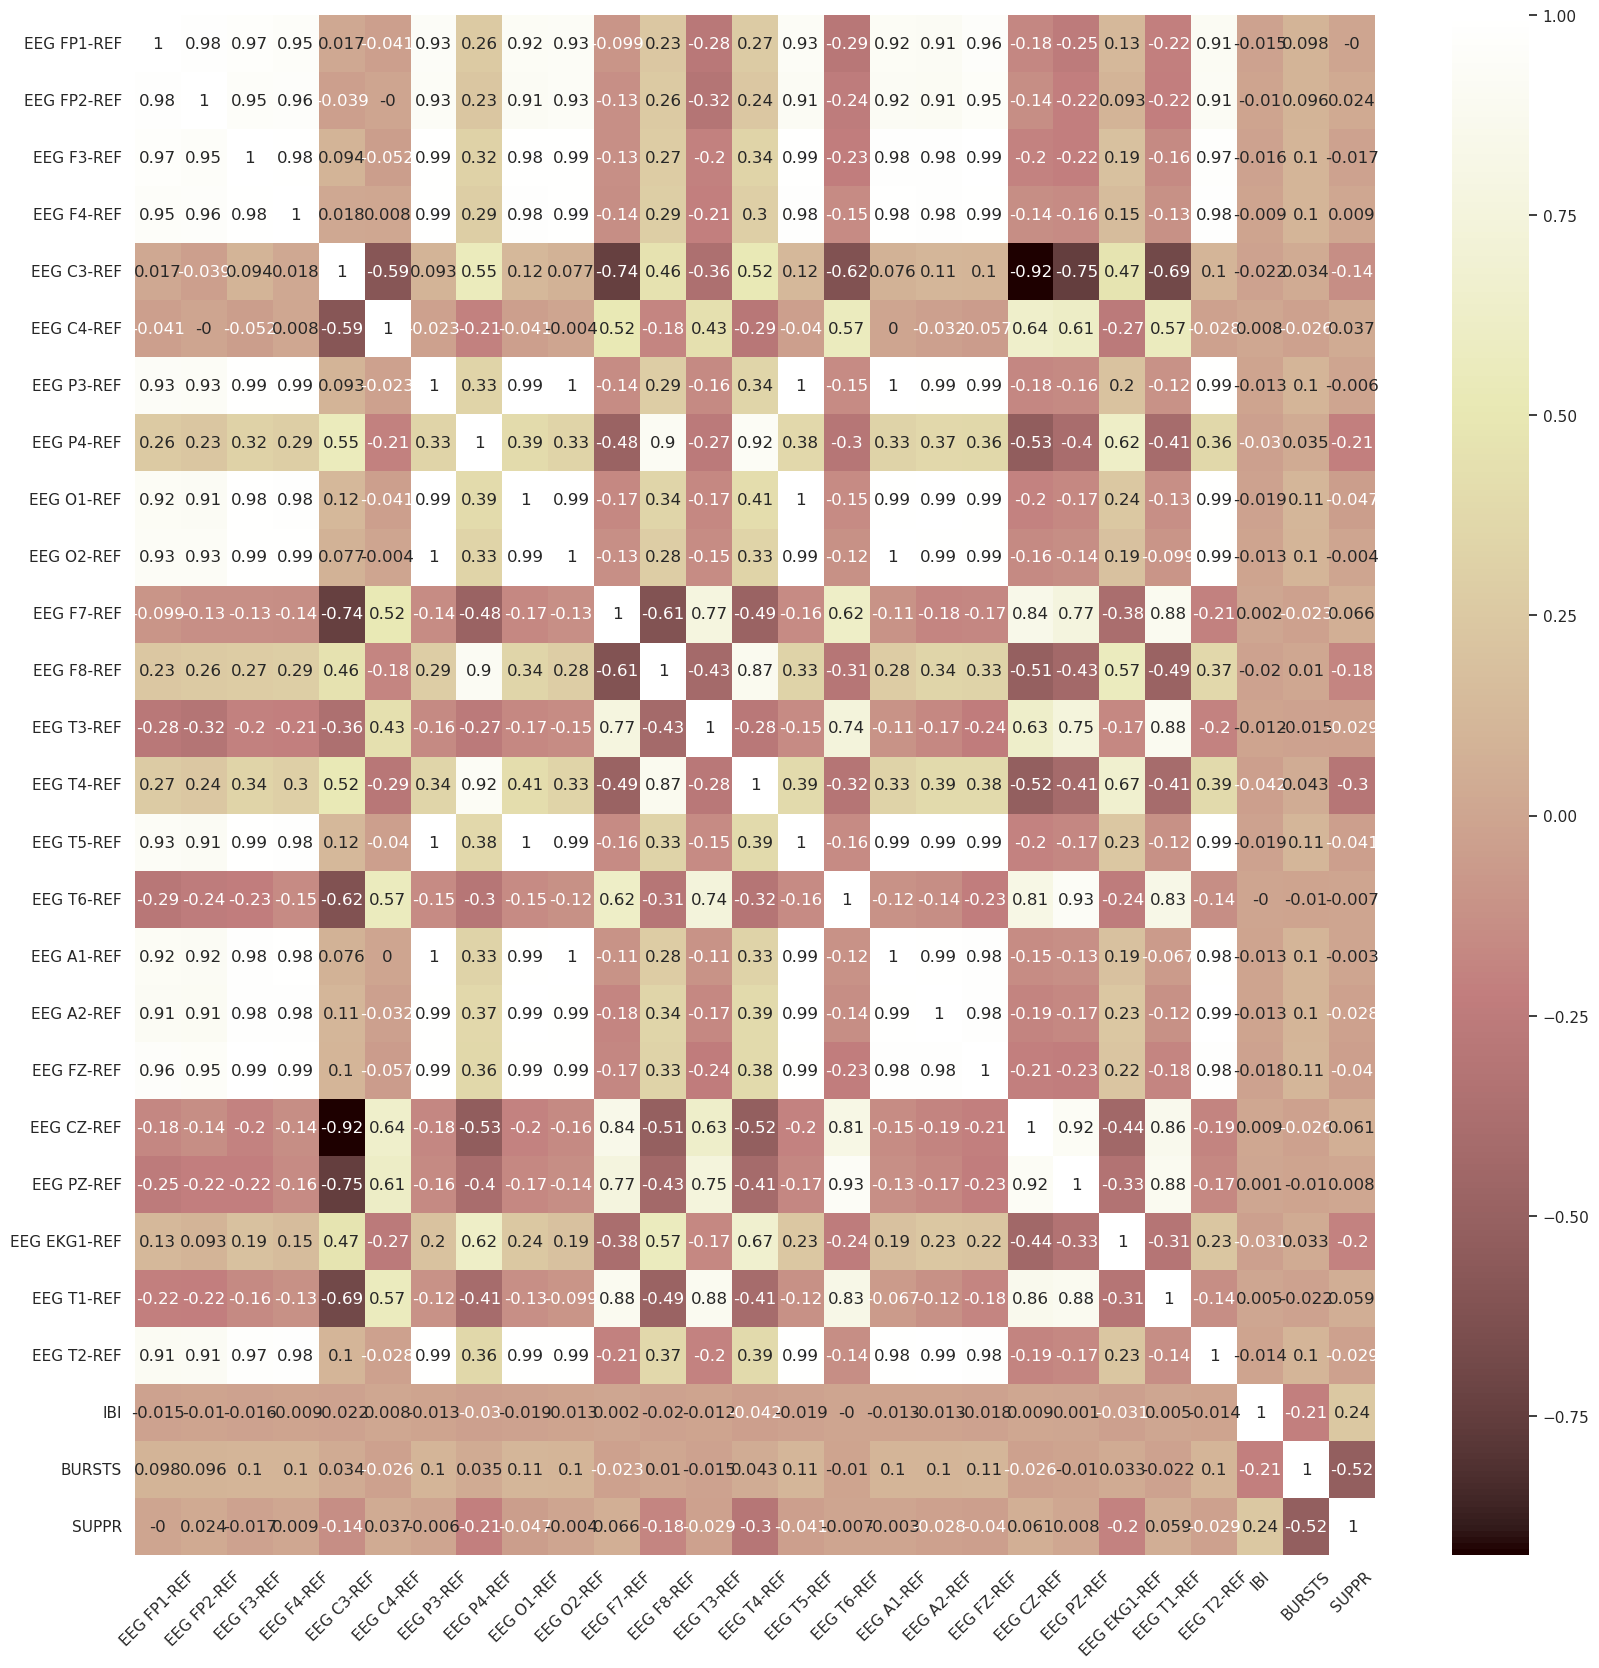

In [91]:
corr = random_entry1.data.corr().round(3)
figure = plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.pink)
plt.xticks(rotation=45)
plt.show()


In [54]:
random_entry2.data.drop_duplicates()

,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG A2-REF,EEG FZ-REF,EEG CZ-REF,EEG PZ-REF,EEG EKG1-REF,EEG T1-REF,EEG T2-REF,IBI,BURSTS,SUPPR
0,-49.130,-47.451,-42.111,-14.492,-41.653,-30.361,-43.331,-18.154,-24.258,-35.855,...,-39.212,-38.296,-42.874,-41.806,-48.672,-52.944,-38.601,0.0,0.0,0.0
1,-46.993,-43.179,-41.958,-14.492,-43.331,-35.702,-45.010,-19.528,-24.563,-35.550,...,-39.212,-37.075,-42.416,-41.500,-52.334,-49.587,-29.141,0.0,0.0,0.0
2,-46.841,-43.179,-42.111,-12.051,-39.669,-36.312,-44.400,-19.070,-23.953,-37.075,...,-39.669,-36.312,-41.653,-40.890,-64.083,-54.318,-35.092,0.0,0.0,0.0
3,-42.874,-40.432,-45.163,-13.577,-43.789,-37.228,-46.688,-21.817,-25.936,-40.127,...,-32.040,-36.618,-42.569,-43.026,-56.759,-50.045,-30.514,0.0,0.0,0.0
4,-34.634,-33.413,-37.686,-18.002,-43.484,-42.416,-48.672,-24.410,-26.852,-38.754,...,-34.634,-34.329,-42.111,-44.552,-58.590,-51.419,-28.836,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329072,-0.912,-4.116,10.227,0.614,7.785,2.445,-2.896,-4.421,-5.337,-8.389,...,0.156,3.513,-5.947,-7.931,23.502,26.401,-7.779,0.0,0.0,0.0
329073,-4.574,-3.506,7.022,0.309,3.971,0.156,-6.558,-8.847,-8.236,-12.356,...,-3.659,2.903,-7.626,-10.830,20.755,24.570,-10.373,0.0,0.0,0.0
329074,-5.947,-5.795,6.412,-0.912,4.276,0.919,-7.016,-10.067,-7.626,-11.746,...,0.309,2.750,-5.947,-11.441,21.061,22.587,-10.373,0.0,0.0,0.0
329075,-5.337,-6.405,7.480,-1.675,5.497,0.461,-6.863,-12.509,-8.541,-13.424,...,-1.980,3.208,-5.032,-14.035,12.973,22.892,-10.983,0.0,0.0,0.0


In [27]:
measurements = next(DataLoader.get_train_iter(batch_size=100))
len(measurements)

100

In [32]:
measurements[0].data.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1])

,EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG A2-REF,EEG FZ-REF,EEG CZ-REF,EEG PZ-REF,EEG EKG1-REF,EEG T1-REF,EEG T2-REF,IBI,BURSTS,SUPPR
0.00,-2844.690,-3694.604,-2173.304,-3186.792,-4011.682,-4864.647,-2402.338,-1034.389,-2504.267,-2660.822,...,-2121.882,-2442.164,-3920.282,-2026.209,-916.591,-3675.988,-2239.985,0.0,0.0,0.0
0.05,-66.830,-68.051,-21.817,-18.917,-12.204,-14.187,-19.070,-19.833,-24.105,-25.784,...,-35.855,-11.135,-8.389,-16.171,-92.617,-32.956,-35.244,4500000.0,500000.0,74100000.0
0.25,-18.307,-21.054,-7.016,-6.253,-4.269,-4.727,-6.558,-7.016,-8.541,-8.999,...,-12.051,-3.659,-3.048,-5.642,-36.465,-9.915,-10.830,7400000.0,600000.0,89600000.0
0.50,-1.370,-2.133,-0.302,-0.149,0.309,0.156,0.156,0.614,0.309,0.309,...,0.309,-0.302,0.004,0.309,2.140,0.766,0.614,45000000.0,700000.0,90450000.0
0.75,16.330,17.398,6.412,6.107,4.886,4.886,6.870,8.091,8.854,9.159,...,12.516,3.360,3.208,6.260,52.188,11.142,11.295,87300000.0,800000.0,92100000.0
0.95,56.919,60.276,19.992,18.467,13.126,13.584,17.704,21.518,23.044,23.655,...,33.725,10.837,8.701,16.330,132.907,30.369,32.352,125000000.0,1600000.0,94400000.0
1.00,4999.847,4999.847,4999.847,4999.847,3599.854,4999.847,4999.847,4959.869,4999.847,4999.847,...,4999.847,4999.847,3996.888,2054.598,4958.648,3703.156,4999.847,293700000.0,6000000.0,94400000.0


<Axes: ylabel='Frequency'>

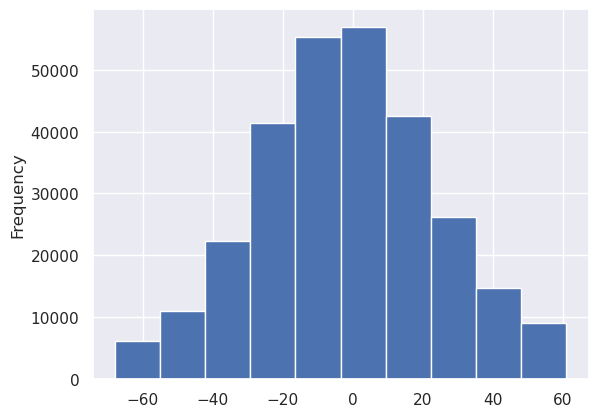

In [49]:
d = measurements[0].data["EEG FP2-REF"]
d.where((d > -68) & (d < 61)).dropna().plot.hist()